In [111]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
%matplotlib inline

import os
for dirname, _, filenames in os.walk('Alcohol_Sales.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [112]:
df = pd.read_csv('Alcohol_Sales.csv')
df.head()

DATE  SALES
0  1992-01-01   3459
1  1992-02-01   3458
2  1992-03-01   4002
3  1992-04-01   4564
4  1992-05-01   4221

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    325 non-null    object
 1   SALES   325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [114]:
df.columns = ['ds', 'y']
df.head()

ds     y
0  1992-01-01  3459
1  1992-02-01  3458
2  1992-03-01  4002
3  1992-04-01  4564
4  1992-05-01  4221

In [115]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

ds     y
0 1992-01-01  3459
1 1992-02-01  3458
2 1992-03-01  4002
3 1992-04-01  4564
4 1992-05-01  4221

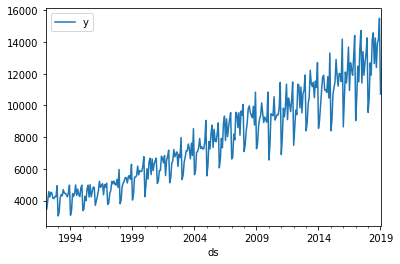

In [116]:
df.plot(x='ds', y='y')

In [117]:
len(df)

325

In [118]:
train = df.iloc[:312]
test = df.iloc[312:]

In [119]:
# Create an instance of Prophet
m = Prophet()
# Fit the training data
m.fit(train)
# Create a future dataframe 
future = m.make_future_dataframe(periods=12, freq='MS') # for daily data no need to specify freq
# making predictions
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [120]:
forecast.shape

(324, 16)

In [121]:
forecast.iloc[-12:,]

ds         trend  ...  multiplicative_terms_upper          yhat
312 2018-01-01  12565.969447  ...                         0.0  10785.123984
313 2018-02-01  12601.105855  ...                         0.0  11273.988228
314 2018-03-01  12632.841965  ...                         0.0  12435.965173
315 2018-04-01  12667.978373  ...                         0.0  12433.621131
316 2018-05-01  12701.981349  ...                         0.0  13139.449633
317 2018-06-01  12737.117757  ...                         0.0  13568.505490
318 2018-07-01  12771.120732  ...                         0.0  12757.478566
319 2018-08-01  12806.257140  ...                         0.0  13146.546482
320 2018-09-01  12841.393548  ...                         0.0  12702.638559
321 2018-10-01  12875.396524  ...                         0.0  13095.259233
322 2018-11-01  12910.532932  ...                         0.0  13093.558795
323 2018-12-01  12944.535907  ...                         0.0  14211.756729

[12 rows x 16 columns]

In [122]:
forecast.tail()

ds         trend  ...  multiplicative_terms_upper          yhat
319 2018-08-01  12806.257140  ...                         0.0  13146.546482
320 2018-09-01  12841.393548  ...                         0.0  12702.638559
321 2018-10-01  12875.396524  ...                         0.0  13095.259233
322 2018-11-01  12910.532932  ...                         0.0  13093.558795
323 2018-12-01  12944.535907  ...                         0.0  14211.756729

[5 rows x 16 columns]

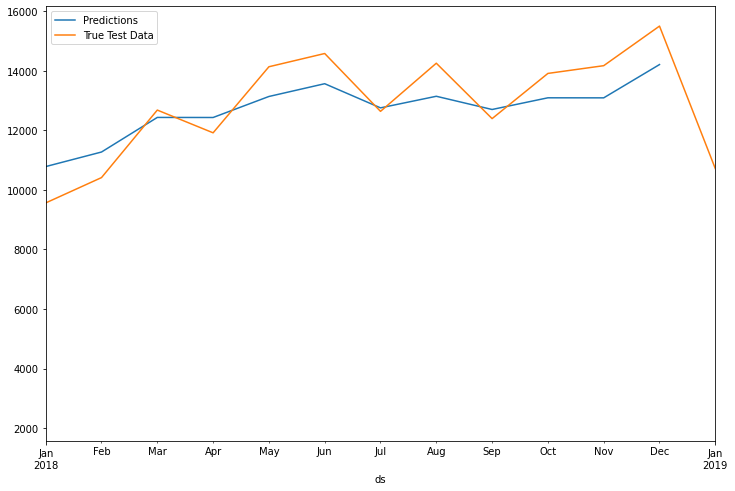

In [123]:
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True, figsize=(12,8))
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-01-01', '2019-01-01'))

In [124]:
from statsmodels.tools.eval_measures import rmse

In [132]:
predictions = forecast.iloc[-13:]['yhat']

In [133]:
predictions

311    13789.813510
312    10785.123984
313    11273.988228
314    12435.965173
315    12433.621131
316    13139.449633
317    13568.505490
318    12757.478566
319    13146.546482
320    12702.638559
321    13095.259233
322    13093.558795
323    14211.756729
Name: yhat, dtype: float64

In [134]:
test['y']

312     9564
313    10415
314    12683
315    11919
316    14138
317    14583
318    12640
319    14257
320    12396
321    13914
322    14174
323    15504
324    10718
Name: y, dtype: int64

In [135]:
# Calculating rmse values
rmse(predictions, test['y'])

1952.4629773405104

In [136]:
test.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    12838.846154
dtype: float64

In [138]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [139]:
initial = 5 * 365
initial = str(initial) + ' days' # as Prophet requires string code

# period length for which we are gonna perform cross validation
period = 5 * 365
period = str(period) + ' days' # as Prophet requires string code

# horizon of prediction for each fold
# we'll forecast one year ahead
horizon = 365
horizon = str(horizon) + ' days'

In [140]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 4 forecasts with cutoffs between 2001-12-05 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

In [141]:
df_cv.head()

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0 2002-01-01  5363.471198  5087.783520  5640.041751  5117 2001-12-05
1 2002-02-01  5588.483101  5311.763147  5854.621608  5442 2001-12-05
2 2002-03-01  6415.999047  6136.667355  6692.833721  6337 2001-12-05
3 2002-04-01  6437.017532  6171.193660  6718.018933  6525 2001-12-05
4 2002-05-01  6821.735478  6535.678099  7105.606780  7216 2001-12-05

In [142]:
len(df_cv)

48

In [143]:
performance_metrics(df_cv)

horizon            mse        rmse  ...      mape     mdape  coverage
0   31 days  807876.111358  898.819287  ...  0.101737  0.101296      0.25
1   58 days  798053.423265  893.338359  ...  0.096425  0.101296      0.25
2   59 days  859281.652220  926.974461  ...  0.103839  0.116124      0.25
3   60 days  636192.793486  797.616947  ...  0.077884  0.064750      0.50
4   62 days  160856.204730  401.068828  ...  0.046155  0.028097      0.75
5   86 days  157052.092364  396.297984  ...  0.042542  0.027560      0.75
6   87 days   38965.421707  197.396610  ...  0.019283  0.019155      1.00
7   89 days   31055.179772  176.224799  ...  0.016298  0.013186      1.00
8   90 days   75441.280300  274.665761  ...  0.019410  0.013186      1.00
9  117 days   75816.296639  275.347592  ...  0.019664  0.013695      1.00
10 118 days  120031.881994  346.456176  ...  0.030940  0.027815      0.75
11 120 days  195989.204140  442.706680  ...  0.042519  0.048184      0.50
12 121 days  193372.108634  439.740956  ...  0.043197  0.049540      0.50
13 147 days  230298.008191  479.893747  ...  0.053486  0.054641      0.25
14 148 days  322046.488529  567.491400  ...  0.059197  0.057431      0.25
15 150 days  448435.534623  669.653294  ...  0.064193  0.066065      0.25
16 151 days  561364.618436  749.242697  ...  0.068663  0.069904      0.00
17 178 days  553039.870389  743.666505  ...  0.067927  0.069904      0.00
18 179 days  455766.911661  675.105112  ...  0.059127  0.057004      0.00
19 181 days  353116.778435  594.236298  ...  0.053395  0.054486      0.00
20 182 days  920758.213560  959.561469  ...  0.067129  0.054486      0.00
21 208 days  904976.986747  951.302784  ...  0.062935  0.049786      0.25
22 209 days  866640.564818  930.935317  ...  0.054883  0.046097      0.50
23 211 days  804268.760279  896.810326  ...  0.050957  0.038245      0.75
24 212 days  247882.288284  497.877784  ...  0.040703  0.038245      0.75
25 239 days  235697.021116  485.486376  ...  0.035559  0.027958      0.75
26 240 days  304259.756835  551.597459  ...  0.046944  0.048600      0.50
27 242 days  422347.433724  649.882631  ...  0.054465  0.063642      0.25
28 243 days  364037.946045  603.355572  ...  0.048912  0.054825      0.25
29 270 days  425323.031484  652.167947  ...  0.065878  0.063642      0.00
30 271 days  384647.067224  620.199216  ...  0.062592  0.062841      0.25
31 273 days  306227.850554  553.378578  ...  0.059657  0.056971      0.25
32 274 days  199902.045428  447.104066  ...  0.052754  0.051200      0.50
33 300 days  137648.489936  371.010094  ...  0.035093  0.034447      0.75
34 301 days  263414.775330  513.239491  ...  0.044909  0.043165      0.50
35 303 days  209737.890241  457.971495  ...  0.037692  0.028731      0.75
36 304 days  187506.145094  433.019798  ...  0.033053  0.021304      0.75
37 331 days  206382.539088  454.293450  ...  0.040817  0.036832      0.50
38 332 days  117574.120248  342.890828  ...  0.034136  0.036832      0.50
39 334 days  169789.458302  412.055164  ...  0.039292  0.047145      0.25
40 335 days  262884.701574  512.722831  ...  0.048985  0.049152      0.00
41 361 days  306036.623978  553.205770  ...  0.054146  0.053348      0.00
42 362 days  284235.798664  533.137692  ...  0.050921  0.049152      0.00
43 364 days  295853.267653  543.923954  ...  0.050702  0.048716      0.00
44 365 days  280342.816499  529.474094  ...  0.048964  0.046460      0.25

[45 rows x 7 columns]

In [144]:
df.head(2)

ds     y
0 1992-01-01  3459
1 1992-02-01  3458

In [145]:
df.tail(2)

ds      y
323 2018-12-01  15504
324 2019-01-01  10718

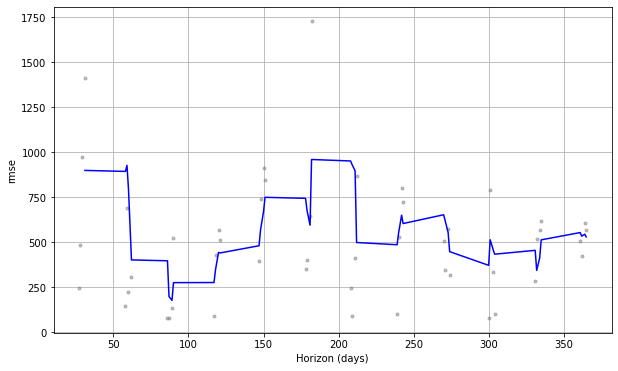

In [146]:
plot_cross_validation_metric(df_cv, metric='rmse');